In [1]:
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
from matplotlib.legend import Legend

num_qudits = 6
colors = sns.color_palette("deep")
markers = ['o', 's', 'D', '^', 'v', '<', '>']

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Latin Modern"],
    "font.size": 14
})

## Spinless

In [2]:
# import data 
with open('../netket/tv_model_data.json', 'r') as file:
    exact = json.load(file)
with open('tv_model_data_sim.json', 'r') as file:
    simul = json.load(file)

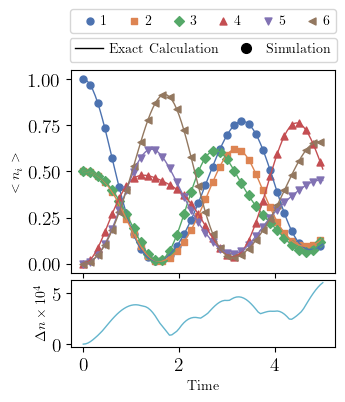

In [7]:

nskip = 3

total_error = np.sum(np.abs(np.array(simul["nums"]) - np.array(exact["nums"])), axis=1)

fig = plt.figure(figsize=(3.4, 3.6))
gs = GridSpec(2, 1, height_ratios=[3, 1], hspace=0.05)
ax1 = fig.add_subplot(gs[0])

for i in range(num_qudits):
    ax1.scatter(simul["temps"][::nskip], np.array(simul["nums"])[:,i][::nskip], label=f"${i+1}$", s=25, marker=markers[i%len(markers)], color=colors[i%len(colors)])
    ax1.plot(exact["temps"], np.array(exact["nums"])[:,i], color=colors[i%len(colors)], linewidth=1)

ax1.set_ylabel(r"$<n_{i}>$", fontsize=10)
ax1.label_outer()

handles, labels = ax1.get_legend_handles_labels()
legend1 = ax1.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.3), ncol=6, fontsize=10, handletextpad=-0.2, borderaxespad=0.0, columnspacing=0.9)
#ax1.add_artist(legend1)
line_legend = mlines.Line2D([], [], color='black', linestyle='-', linewidth=1.0, label=f"       Exact Calculation")
marker_legend = mlines.Line2D([], [], color='black', marker='o', linestyle='None', markersize=7, label='Simulation')
legend2 = Legend(ax1, [line_legend, marker_legend], ["Exact Calculation", "Simulation"], loc='upper center', ncol=2,
                 fontsize=10, handletextpad=+0.45, borderaxespad=0.4, bbox_to_anchor=(0.5, 1.185), columnspacing=1)
ax1.add_artist(legend2)


# Bottom plot
ax2 = fig.add_subplot(gs[1], sharex=ax1)
ax2.plot(simul["temps"], total_error*1e4, label="Total Error", color=colors[-1], linewidth=1)
ax2.set_ylabel(r"$\Delta n \times 10^4$", fontsize=10)
ax2.set_xlabel("Time", fontsize=10)

plt.savefig("tv_model_numbers.pdf", bbox_inches='tight', pad_inches=0.1)
plt.show()

## Spinful

In [8]:
# import data 
with open('../netket/spinful_data.json', 'r') as file:
    exact = json.load(file)
with open('spinful_data_sim.json', 'r') as file:
    simul = json.load(file)

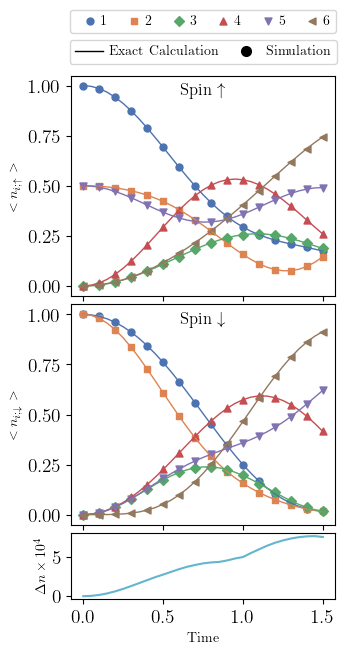

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# skip every n
nskip = 2

# Number of qudits
num_qudits = 12

# Calculate total error
total_error = np.sum(np.abs(np.array(simul["nums"]) - np.array(exact["nums"])), axis=1)

# Create a figure with fixed size
fig = plt.figure(figsize=(3.4, 3.4*2))
gs = GridSpec(3, 1, height_ratios=[1, 1, 0.3], hspace=0.05)

# Top subplot for spin up
ax1 = fig.add_subplot(gs[0])
for i in range(0, num_qudits, 2):  # Loop through spin up qudits
    num_idx = i // 2
    arrow = "" #r"$\uparrow$"
    ax1.scatter(simul["temps"][::nskip], np.array(simul["nums"])[:,i][::nskip], label=f"${num_idx+1}$"+arrow, s=25, marker=markers[num_idx % len(markers)], color=colors[num_idx % len(colors)])
    ax1.plot(exact["temps"], np.array(exact["nums"])[:,i], linestyle='-', color=colors[num_idx % len(colors)], linewidth=1)

ax1.set_ylabel(r"$<n_{i;\uparrow}>$", fontsize=10)
ax1.label_outer()
ax1.set_title(r"Spin $\uparrow$", fontsize=12, y=1.0, pad=-14)

# Subplot for spin down
ax2 = fig.add_subplot(gs[1], sharex=ax1)
for i in range(1, num_qudits, 2):  # Loop through spin down qudits
    num_idx = i // 2
    arrow = r"$\downarrow$"
    ax2.scatter(simul["temps"][::nskip], np.array(simul["nums"])[:,i][::nskip], label=f"${num_idx+1}$"+arrow, s=25, marker=markers[num_idx % len(markers)], color=colors[num_idx % len(colors)])
    ax2.plot(exact["temps"], np.array(exact["nums"])[:,i], linestyle='-', color=colors[num_idx % len(colors)], linewidth=1)

ax2.set_ylabel(r"$<n_{i;\downarrow}>$", fontsize=10)
ax2.label_outer()
ax2.set_title(r"Spin $\downarrow$", fontsize=12, y=1.0, pad=-14)

# Bottom subplot for total error
ax3 = fig.add_subplot(gs[2], sharex=ax1)
ax3.plot(simul["temps"], total_error*1e4, label="Total Error", color=colors[-1], linestyle='-')
ax3.set_ylabel(r"$\Delta n \times 10^4$", fontsize=10)
ax3.set_xlabel("Time", fontsize=10)

# Adjust legend
handles, labels = ax1.get_legend_handles_labels()
legend1 = ax1.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.3), ncol=6, fontsize=10, handletextpad=-0.2, borderaxespad=0.0, columnspacing=0.9)
#ax1.add_artist(legend1)

# Create custom legend elements
line_legend = mlines.Line2D([], [], color='black', linestyle='-', linewidth=1.0, label='Exact Calculation')
marker_legend = mlines.Line2D([], [], color='black', marker='o', linestyle='None', markersize=7, label='Simulation')

# Add the second legend to the plot
line_legend = mlines.Line2D([], [], color='black', linestyle='-', linewidth=1.0, label=f"       Exact Calculation")
marker_legend = mlines.Line2D([], [], color='black', marker='o', linestyle='None', markersize=7, label='Simulation')
legend2 = Legend(ax1, [line_legend, marker_legend], ["Exact Calculation", "Simulation"], loc='upper center', ncol=2,
                 fontsize=10, handletextpad=+0.45, borderaxespad=0.4, bbox_to_anchor=(0.5, 1.185), columnspacing=1)

ax1.add_artist(legend2)

# Make sure the original legend is still shown

# Save and show plot
plt.savefig("spinful_numbers.pdf", bbox_inches='tight', pad_inches=0.1)
plt.show()
